<a href="https://colab.research.google.com/github/IngridContreras1/IngridContreras1.github.io/blob/main/Modelo_20250519_Analisis_de_permanencia_de_las_polizas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Datacamp: Analisis de datos Permanencia / Duracion de las polizas de Seguros en BNP Paribas Cardif Colombia**

Este cuaderno genera un conjunto de datos sintéticos de pólizas de seguro y realiza un análisis exploratorio inicial para comprender las características de los clientes y las pólizas.

# Análisis de Datos de Pólizas de Seguro

Este datacamp está dedicado al desarrollo de un pipeline de machine learning para predecir el estado de la poliza de los clientes, basándose en su interacción con la 'nueva experiencia del cliente'.

Específicamente, tiene como objetivo predecir la permanencia del cliente cuando recibe la "landing de bienvenida" y califica positivamente el proceso de venta con el NPS. Así mismo, predecirá la cancelación cuando los clientes no reciben la 'Nueva experiencia cliente' o cuando califican el NPS del proceso de venta por debajo de 5.

El conjunto de datos se almacena en **DataFrame_Sales_and_Experience_ResultsCO_v1 file.cvs**

El conjunto de datos entregado contiene las siguientes características que pueden ser utilizadas para diseñar el pipeline de machine learning:

1- ventas nuevas en Colombia para los años 2023 y 2024 de pólizas de seguros de los ramos de
vida,
accidentes personales,
desempleo,
sustracción,
hogar,
enfermedades graves,
incendio,
terremoto

2- La base de datos de las nuevas pólizas vendidas contiene:
* primer nombre
* primer apellido
* género: Masculino o femenino según primer nombre
* identificacion
* fecha de nacimiento: donde la edad este entre los 18 años y los 70 años
* tipo de cobertura póliza: Vida, accidentes personales, desempleo, sustracción, hogar, enfermedades graves, incendio o terremoto
* línea financiera a la que está vinculada para pago la póliza: tarjetas de crédito o cuentas o créditos
* número de poliza
* fecha de inicio de vigencia de la póliza
* fecha fin de vigencia de la póliza
* vigencia de póliza = Anual o mensual
* estado de la póliza = Vigente o cancelada
* altura de vigencias recaudadas
* causal de cancelacion = Voluntaria, mala venta, mora, madurez
* fecha de cancelacion de la poliza cuando es Voluntaria, mala venta, mora, madurez

**Paso 1: Importar Librerías**

Importamos las librerías necesarias para el desarrollo del modelo. Para este caso, trabajamos con pandas para la manipulación de datos y numpy para la generación de números aleatorios. Asi mismo incluimos las librerías para visualización de los datos como matplotlib y seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from datetime import datetime, timedelta
from collections import Counter

**Paso 2: Escribir el detalle de la información, datos y demas variables con la cual se creara la base de datos sintetica**

In [ ]:
# Parámetros para la generación de datos de Enero 2023 a Diciembre 2024
n_meses = 24
polizas_por_mes = 18000
n_polizas_total = n_meses * polizas_por_mes

In [ ]:
# Listas de nombres y apellidos comunes (puedes ampliar estas listas)
nombres_masculinos = ['Juan', 'Pedro', 'Luis', 'Carlos', 'Miguel', 'Jorge', 'Guillermo', 'Edgar', 'Ivan', 'Fernando', 'Andres', 'Rodrigo', 'Felipe', 'Simon']
nombres_femeninos = ['Ana', 'Maria', 'Laura', 'Sofia', 'Isabella', 'Valeria', 'Marcela', 'Liliana', 'Blanca', 'Flor', 'Andrea', 'Liz', 'Paula', 'Elisa']
apellidos = ['Gomez', 'Rodriguez', 'Lopez', 'Martinez', 'Perez', 'Sanchez', 'Arias', 'Contreras', 'Sierra', 'Acosta', 'Castellanos', 'Carvajal', 'Renteria', 'Mesa']

In [ ]:
# Rango de edad para establecer la fecha de nacimiento y distribucion del genero
distribucion_genero = {'Masculino': 0.5329, 'Femenino': 0.4671}

In [ ]:
# Rango de edad para la fecha de nacimiento
edad_minima = 18
edad_maxima = 70

In [ ]:
# Tipos de póliza y su mix de producción
ramos_poliza = ['Vida', 'Accidentes Personales', 'Desempleo', 'Sustracción',
                'Hogar', 'Enfermedades Graves', 'Incendio', 'Terremoto']
mix_produccion = {
    'Vida': 0.2882,
    'Accidentes Personales': 0.2353,
    'Desempleo': 0.2116,
    'Sustracción': 0.1545,
    'Hogar': 0.0397,
    'Enfermedades Graves': 0.0390,
    'Incendio': 0.0211,
    'Terremoto': 0.0106
}

In [ ]:
# Líneas financieras y su distribución
lineas_financieras = {
    'créditos': ['Desempleo'],  # Solo desempleo va a créditos
    'Tarjetas de crédito': 0.6732,
    'cuentas': 0.3268
}

In [ ]:
# Definir rangos de fechas de inicio de vigencia
fecha_inicio_rango = pd.to_datetime('2023-01-01')
fecha_fin_rango = pd.to_datetime('2024-12-31')

In [ ]:
# Variables de recaudo y tasas de cancelacion
tasa_cancelacion_mensual = 0.0302
efectividad_recaudo = 0.9103

In [ ]:
# Definir los posibles estados de la póliza y sus probabilidades
estado_poliza = {
    'Vigente': 0.95,
    'Cancelada': 0.05
}

In [ ]:
# Define probabilities for customer experience interactions (example values)
prob_landing_si = 0.75
prob_calificacion_si = 0.60

**Paso 3: Generar el conjunto de datos sintético**

Procederemos a generar cada una de las columnas del conjunto de datos, validando que se respeten los criterios o parametros definidos.

Y agregaremos la informacion correspondiente a la experiencia cliente

* Entrega de la landing de bienvenida (Si / No)
* Calificacion del NPS de la venta (Si / No)
* Rate del NPS (0 al 10)

In [ ]:
data = []


for _ in range(n_polizas_total):
    # Generar nombre y género basado en la distribución
    genero = np.random.choice(list(distribucion_genero.keys()), p=list(distribucion_genero.values()))
    if genero == 'Masculino':
        primer_nombre = random.choice(nombres_masculinos)
    else:
        primer_nombre = random.choice(nombres_femeninos)
    primer_apellido = random.choice(apellidos)

    # Generar identificacion (ejemplo: un número aleatorio único de 10 digitos)
    identificacion = random.randint(1000000000, 9999999999)

    # Generar fecha de nacimiento (entre 18 y 70 años)
    hoy = datetime.now()
    fecha_nacimiento = hoy - timedelta(days=random.randint(edad_minima * 365, edad_maxima * 365))

    # Generar tipo de póliza basado en el mix de producción
    tipo_poliza = random.choices(list(tipos_poliza.keys()), weights=list(tipos_poliza.values()), k=1)[0]

    # Generar línea financiera
    if tipo_poliza == 'Desempleo':
        linea_financiera = 'créditos'
    else:
        linea_financiera = random.choices(['Tarjetas de crédito', 'cuentas'], weights=[lineas_financieras['Tarjetas de crédito'], lineas_financieras['cuentas']], k=1)[0]

    # Generar numero de poliza (ejemplo: un número aleatorio único de 12 dígitos)
    numero_poliza = random.randint(100000000000, 999999999999)

    # Generar fecha de inicio y fin de vigencia (2023 o 2024)
    time_between_dates = fecha_fin_rango - fecha_inicio_rango
    random_days = random.randrange(time_between_dates.days)
    fecha_inicio_vigencia = fecha_inicio_rango + timedelta(days=random_days)

    tipo_vigencia = random.choice(['Anual', 'Mensual'])
    if tipo_vigencia == 'Anual':
        fecha_fin_vigencia = fecha_inicio_vigencia + timedelta(days=365)
    else:
        fecha_fin_vigencia = fecha_inicio_vigencia + timedelta(days=30)

    # Generar estado de la poliza based on the defined probabilities
    estado_actual_poliza = random.choices(list(estado_poliza.keys()), weights=list(estado_poliza.values()), k=1)[0]

    # Generar causal_cancelacion y fecha_cancelacion
    causal_cancelacion = np.nan
    fecha_cancelacion = np.nan

    # Si la poliza esta en estado cancelado, incluir la causal y la fecha de cancelacion
    if estado_actual_poliza == 'Cancelada':
        # Definir las posibles causales y su participacion en el total de cancelaciones
        causal_cancelacion_dist = {'Voluntaria': 0.4, 'mala venta': 0.2, 'mora': 0.3, 'madurez': 0.1}
        causal_cancelacion = random.choices(list(causal_cancelacion_dist.keys()), weights=list(causal_cancelacion_dist.values()), k=1)[0]
                # Generar la fecha de cancelacion la cual no podra ser mayo a la fecha actual
        if fecha_fin_vigencia > datetime.now():
            fecha_cancelacion_end_range = datetime.now()
        else:
            fecha_cancelacion_end_range = fecha_fin_vigencia

        time_between_vigencia = fecha_cancelacion_end_range - fecha_inicio_vigencia
        if time_between_vigencia.days > 0:
             random_days_cancel = random.randrange(time_between_vigencia.days)
             fecha_cancelacion = fecha_inicio_vigencia + timedelta(days=random_days_cancel)
        else:
             fecha_cancelacion = fecha_inicio_vigencia # or handle as appropriate


    # Generar datos sobre la interacción con el cliente
    recibio_landing = np.random.choice(['Si', 'No'], p=[prob_landing_si, 1 - prob_landing_si])
    califico_experiencia = 'No Aplica'
    calificacion = np.nan

    if recibio_landing == 'Si':
        califico_experiencia = np.random.choice(['Si', 'No'], p=[prob_calificacion_si, 1 - prob_calificacion_si])
        if califico_experiencia == 'Si':
            # Distribución de calificaciones (ejemplo: más calificaciones altas)
            calificacion_distribucion = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
            pesos_calificacion = [1, 1, 1, 2, 3, 5, 7, 10, 15, 20, 30] # Ejemplo de distribución sesgada
            calificacion = random.choices(calificacion_distribucion, weights=pesos_calificacion, k=1)[0]

    data.append([
        primer_nombre,
        primer_apellido,
        genero,
        identificacion,
        fecha_nacimiento.strftime('%Y-%m-%d'),
        tipo_poliza,
        numero_poliza,
        linea_financiera,
        fecha_inicio_vigencia.strftime('%Y-%m-%d'),
        fecha_fin_vigencia.strftime('%Y-%m-%d'),
        tipo_vigencia,
        estado_actual_poliza,
        causal_cancelacion,  # Added causal_cancelacion
        fecha_cancelacion.strftime('%Y-%m-%d') if pd.notna(fecha_cancelacion) else np.nan, # Added fecha_cancelacion
        recibio_landing,
        califico_experiencia,
        calificacion,
       ])

In [ ]:
# Crear DataFrame de pandas
column_names = [
    'primer_nombre',
    'primer_apellido',
    'genero',
    'identificacion',
    'fecha_nacimiento',
    'tipo_poliza',
    'numero_poliza',
    'linea_financiera',
    'fecha_inicio_vigencia',
    'fecha_fin_vigencia',
    'tipo_vigencia',
    'estado_actual_poliza',
    'causal_cancelacion',
    'fecha_cancelacion',
    'recibio_landing',
    'califico_experiencia',
    'calificacion'
    ]

df_ventas = pd.DataFrame(data, columns=column_names)

In [ ]:
data

[['Ivan',
  'Sierra',
  np.str_('Masculino'),
  6614440277,
  '2004-08-20',
  'Accidentes Personales',
  436035153171,
  'Tarjetas de crédito',
  '2023-03-14',
  '2024-03-13',
  'Anual',
  'Vigente',
  nan,
  nan,
  np.str_('Si'),
  np.str_('Si'),
  6],
 ['Edgar',
  'Gomez',
  np.str_('Masculino'),
  4158890702,
  '1999-05-22',
  'Desempleo',
  478078127427,
  'créditos',
  '2023-08-28',
  '2023-09-27',
  'Mensual',
  'Vigente',
  nan,
  nan,
  np.str_('Si'),
  np.str_('Si'),
  3],
 ['Andrea',
  'Sierra',
  np.str_('Femenino'),
  3428483631,
  '1986-10-26',
  'Sustracción',
  361144066063,
  'Tarjetas de crédito',
  '2023-11-09',
  '2023-12-09',
  'Mensual',
  'Vigente',
  nan,
  nan,
  np.str_('Si'),
  np.str_('Si'),
  9],
 ['Edgar',
  'Carvajal',
  np.str_('Masculino'),
  6974674634,
  '1963-01-20',
  'Sustracción',
  492625375080,
  'Tarjetas de crédito',
  '2024-08-27',
  '2024-09-26',
  'Mensual',
  'Vigente',
  nan,
  nan,
  np.str_('No'),
  'No Aplica',
  nan],
 ['Ivan',
  'Carv

**Paso 4: Exploración inicial del conjunto de datos**

Utilizaremos head() e info() para tener una primera impresión de la estructura y los tipos de datos del DataFrame generado.

In [ ]:
df_ventas.head()

,primer_nombre,primer_apellido,genero,identificacion,fecha_nacimiento,tipo_poliza,numero_poliza,linea_financiera,fecha_inicio_vigencia,fecha_fin_vigencia,tipo_vigencia,estado_actual_poliza,causal_cancelacion,fecha_cancelacion,recibio_landing,califico_experiencia,calificacion
0,Ivan,Sierra,Masculino,6614440277,2004-08-20,Accidentes Personales,436035153171,Tarjetas de crédito,2023-03-14,2024-03-13,Anual,Vigente,NaN,NaN,Si,Si,6.0
1,Edgar,Gomez,Masculino,4158890702,1999-05-22,Desempleo,478078127427,créditos,2023-08-28,2023-09-27,Mensual,Vigente,NaN,NaN,Si,Si,3.0
2,Andrea,Sierra,Femenino,3428483631,1986-10-26,Sustracción,361144066063,Tarjetas de crédito,2023-11-09,2023-12-09,Mensual,Vigente,NaN,NaN,Si,Si,9.0
3,Edgar,Carvajal,Masculino,6974674634,1963-01-20,Sustracción,492625375080,Tarjetas de crédito,2024-08-27,2024-09-26,Mensual,Vigente,NaN,NaN,No,No Aplica,NaN
4,Ivan,Carvajal,Masculino,8149367435,2001-07-30,Accidentes Personales,394725821397,Tarjetas de crédito,2023-06-06,2024-06-05,Anual,Vigente,NaN,NaN,Si,Si,6.0


In [ ]:
# print("Primeras filas del DataFrame:")
print(df_ventas.head())

  primer_nombre primer_apellido     genero  identificacion fecha_nacimiento  \
0          Ivan          Sierra  Masculino      6614440277       2004-08-20   
1         Edgar           Gomez  Masculino      4158890702       1999-05-22   
2        Andrea          Sierra   Femenino      3428483631       1986-10-26   
3         Edgar        Carvajal  Masculino      6974674634       1963-01-20   
4          Ivan        Carvajal  Masculino      8149367435       2001-07-30   

             tipo_poliza  numero_poliza     linea_financiera  \
0  Accidentes Personales   436035153171  Tarjetas de crédito   
1              Desempleo   478078127427             créditos   
2            Sustracción   361144066063  Tarjetas de crédito   
3            Sustracción   492625375080  Tarjetas de crédito   
4  Accidentes Personales   394725821397  Tarjetas de crédito   

  fecha_inicio_vigencia fecha_fin_vigencia tipo_vigencia estado_actual_poliza  \
0            2023-03-14         2024-03-13         Anual   

In [ ]:
# print("\nInformación del DataFrame:")
print(df_ventas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432000 entries, 0 to 431999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   primer_nombre          432000 non-null  object 
 1   primer_apellido        432000 non-null  object 
 2   genero                 432000 non-null  object 
 3   identificacion         432000 non-null  int64  
 4   fecha_nacimiento       432000 non-null  object 
 5   tipo_poliza            432000 non-null  object 
 6   numero_poliza          432000 non-null  int64  
 7   linea_financiera       432000 non-null  object 
 8   fecha_inicio_vigencia  432000 non-null  object 
 9   fecha_fin_vigencia     432000 non-null  object 
 10  tipo_vigencia          432000 non-null  object 
 11  estado_actual_poliza   432000 non-null  object 
 12  causal_cancelacion     21770 non-null   object 
 13  fecha_cancelacion      21770 non-null   object 
 14  recibio_landing        432000 non-nu

In [ ]:
missing_values = df_ventas.isnull().sum().sort_values(ascending=False)
print(missing_values)

fecha_cancelacion        410230
causal_cancelacion       410230
calificacion             237695
primer_nombre                 0
primer_apellido               0
tipo_poliza                   0
genero                        0
identificacion                0
fecha_nacimiento              0
fecha_inicio_vigencia         0
linea_financiera              0
numero_poliza                 0
fecha_fin_vigencia            0
estado_actual_poliza          0
tipo_vigencia                 0
recibio_landing               0
califico_experiencia          0
dtype: int64


In [ ]:
calificacion_rate = df_ventas['calificacion'].mean()
print(f"calificacion_rate: {calificacion_rate:.2f}")

calificacion_rate: 7.98


**Paso 5: Análisis descriptivo de las ventas**

Realizaremos análisis descriptivos para entender la distribución de las ventas por tipo de póliza, línea financiera y el mix de género.

In [ ]:
# Configurar estilo de visualización
sns.set(style="whitegrid")

In [ ]:
print("\nDistribución por tipo de póliza:")
print(df_ventas['tipo_poliza'].value_counts(normalize=True))


Distribución por tipo de póliza:
tipo_poliza
Vida                     0.288231
Accidentes Personales    0.234655
Desempleo                0.211766
Sustracción              0.155560
Hogar                    0.039058
Enfermedades Graves      0.038944
Incendio                 0.020977
Terremoto                0.010808
Name: proportion, dtype: float64


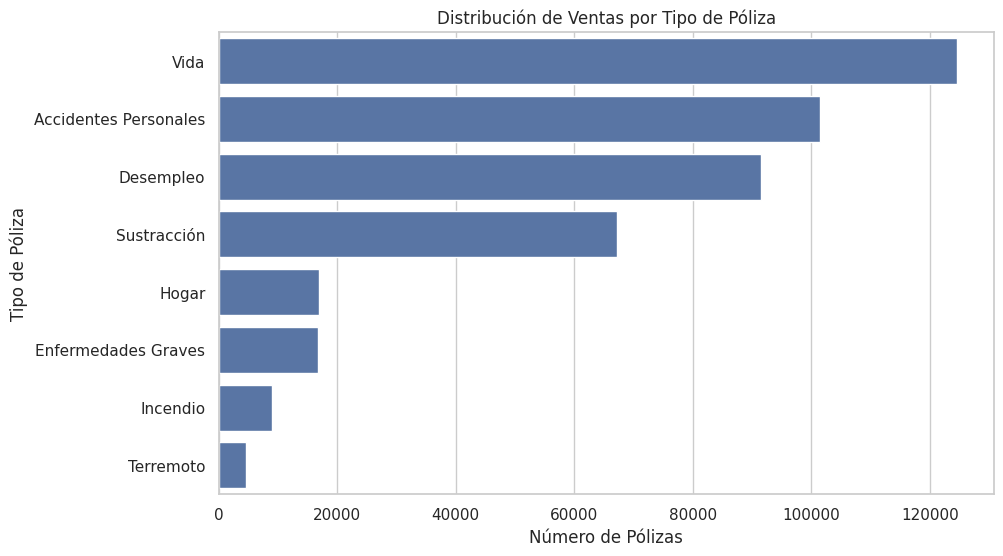

In [ ]:
# Visualización de la distribución por tipo de póliza
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ventas, y='tipo_poliza', order=df_ventas['tipo_poliza'].value_counts().index)
plt.title('Distribución de Ventas por Tipo de Póliza')
plt.xlabel('Número de Pólizas')
plt.ylabel('Tipo de Póliza')
plt.show()

In [ ]:
print("\nDistribución por línea financiera:")
print(df_ventas['linea_financiera'].value_counts(normalize=True))


Distribución por línea financiera:
linea_financiera
Tarjetas de crédito    0.530565
cuentas                0.257669
créditos               0.211766
Name: proportion, dtype: float64


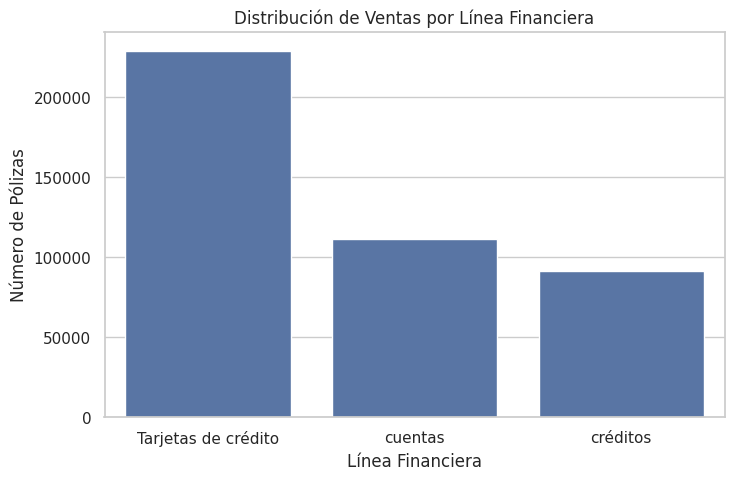

In [ ]:
# Visualización de la distribución por línea financiera
plt.figure(figsize=(8, 5))
sns.countplot(data=df_ventas, x='linea_financiera', order=df_ventas['linea_financiera'].value_counts().index)
plt.title('Distribución de Ventas por Línea Financiera')
plt.xlabel('Línea Financiera')
plt.ylabel('Número de Pólizas')
plt.show()

In [ ]:
print("\nDistribución por género:")
print(df_ventas['genero'].value_counts(normalize=True))


Distribución por género:
genero
Masculino    0.531139
Femenino     0.468861
Name: proportion, dtype: float64


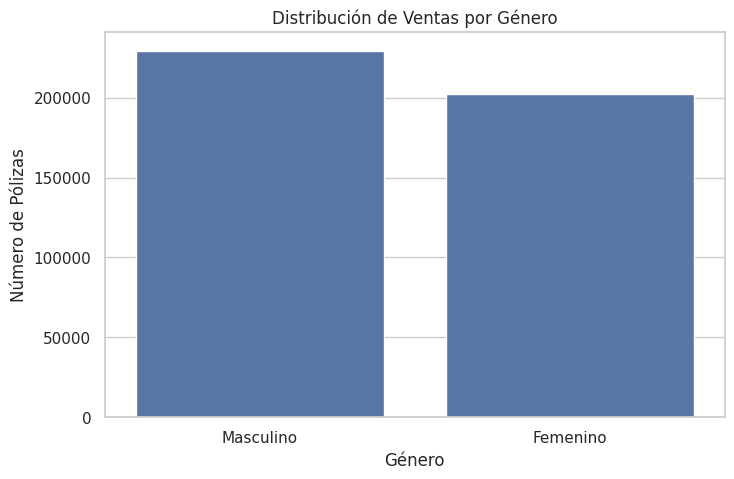

In [ ]:
# Visualización de la distribución por genero
plt.figure(figsize=(8, 5))
sns.countplot(data=df_ventas, x='genero', order=df_ventas['genero'].value_counts().index)
plt.title('Distribución de Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Número de Pólizas')
plt.show()

In [ ]:
print("\nDistribucion por estado de la póliza:")
print(df_ventas["estado_actual_poliza"].value_counts(normalize=True))


Distribucion por estado de la póliza:
estado_actual_poliza
Vigente      0.949606
Cancelada    0.050394
Name: proportion, dtype: float64


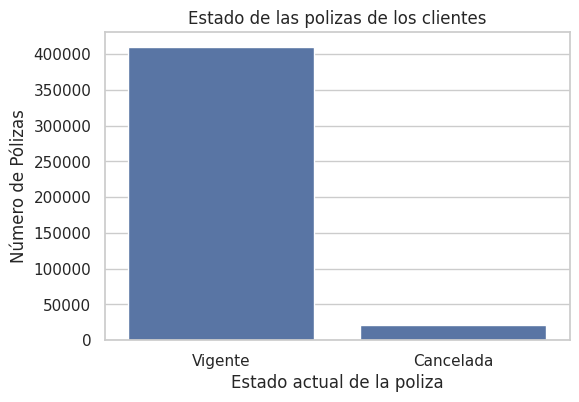

In [ ]:
# Visualización de la distribución de 'estado_poliza'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_ventas, x='estado_actual_poliza')
plt.title('Estado de las polizas de los clientes')
plt.xlabel('Estado actual de la poliza')
plt.ylabel('Número de Pólizas')
plt.show()

In [ ]:
print("\nDistribucion por causal de cancelacion de la póliza:")
print(df_ventas["causal_cancelacion"].value_counts(normalize=True))


Distribucion por causal de cancelacion de la póliza:
causal_cancelacion
Voluntaria    0.408222
mora          0.298163
mala venta    0.194901
madurez       0.098714
Name: proportion, dtype: float64


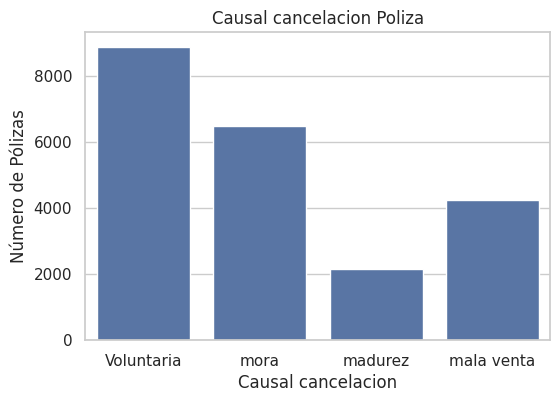

In [ ]:
# Visualización de la distribución de 'causal_cancelacion'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_ventas, x='causal_cancelacion')
plt.title('Causal cancelacion Poliza')
plt.xlabel('Causal cancelacion')
plt.ylabel('Número de Pólizas')
plt.show()

**Paso 6: Análisis de la interacción en la venta con el cliente**

Exploraremos los datos relacionados con la recepción de la landing page y la calificación de la experiencia del cliente.

In [ ]:
print("\nDistribución de 'recibio_landing':")
print(df_ventas['recibio_landing'].value_counts(normalize=True))


Distribución de 'recibio_landing':
recibio_landing
Si    0.749968
No    0.250032
Name: proportion, dtype: float64


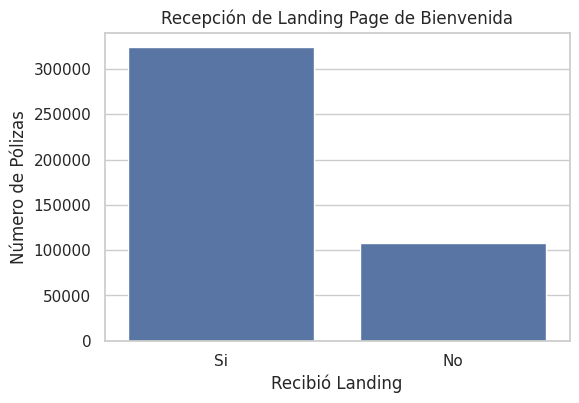

In [ ]:
# Visualización de la distribución de 'recibio_landing'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_ventas, x='recibio_landing')
plt.title('Recepción de Landing Page de Bienvenida')
plt.xlabel('Recibió Landing')
plt.ylabel('Número de Pólizas')
plt.show()

In [ ]:
print("\nDistribución de 'califico_experiencia' para quienes recibieron la landing:")
df_landing_si = df_ventas[df_ventas['recibio_landing'] == 'Si']
print(df_landing_si['califico_experiencia'].value_counts(normalize=True))


Distribución de 'califico_experiencia' para quienes recibieron la landing:
califico_experiencia
Si    0.599733
No    0.400267
Name: proportion, dtype: float64


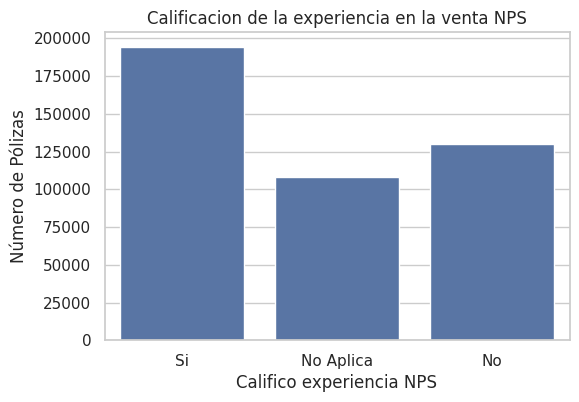

In [ ]:
# Visualización de la distribución de 'Califico la experiencia en la venta NPS'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_ventas, x='califico_experiencia')
plt.title('Calificacion de la experiencia en la venta NPS')
plt.xlabel('Califico experiencia NPS')
plt.ylabel('Número de Pólizas')
plt.show()

In [ ]:
print("\nDistribución de 'calificacion' para quienes calificaron la experiencia:")
df_calificaron = df_landing_si[df_landing_si['califico_experiencia'] == 'Si']
print(df_calificaron['calificacion'].value_counts(normalize=True).sort_index())


Distribución de 'calificacion' para quienes calificaron la experiencia:
calificacion
0.0     0.010607
1.0     0.010674
2.0     0.010648
3.0     0.020900
4.0     0.031878
5.0     0.052351
6.0     0.074280
7.0     0.104815
8.0     0.157453
9.0     0.210571
10.0    0.315823
Name: proportion, dtype: float64


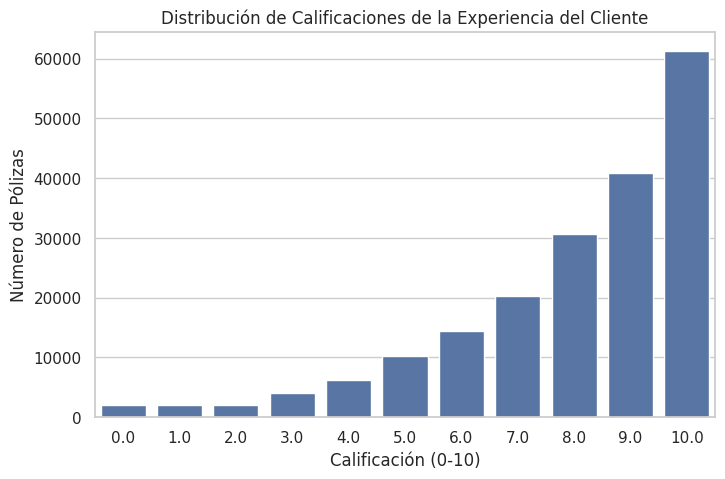

In [ ]:
# Visualización de la distribución de 'calificacion' (solo para quienes calificaron)
if not df_calificaron.empty:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_calificaron, x='calificacion', order=sorted(df_calificaron['calificacion'].unique()))
    plt.title('Distribución de Calificaciones de la Experiencia del Cliente')
    plt.xlabel('Calificación (0-10)')
    plt.ylabel('Número de Pólizas')
    plt.show()

**Paso 7: Calculo de otros datos relevantes en el análisis sobre la data sintética**

* Analizar la edad de los clientes por tipo de póliza.
* Calcular el numero de meses de duracion de la poliza entre la fecha de inicio y la fecha fin.  Para las polizas en estado cancelado tomar como fecha de referencia la fecha de cancelacion de la poliza.
* Analizar la tasa de recepcion de la Landing segun el tipo de poliza
* Analizar la tasa de respuesta a la encuesta de NPS segun tipo de poliza

In [ ]:
# Cálculo de la Edad promedio por tipo de póliza
# Convertir 'fecha_nacimiento' a datetime
df_ventas['fecha_nacimiento'] = pd.to_datetime(df_ventas['fecha_nacimiento'])

# Calcular la edad
hoy = datetime.now()
df_ventas['edad'] = (hoy - df_ventas['fecha_nacimiento']).dt.days // 365

print("\nEdad promedio por tipo de póliza:")
print(df_ventas.groupby('tipo_poliza')['edad'].mean())


Edad promedio por tipo de póliza:
tipo_poliza
Accidentes Personales    43.474909
Desempleo                43.495797
Enfermedades Graves      43.332442
Hogar                    43.303621
Incendio                 43.651733
Sustracción              43.513928
Terremoto                43.565003
Vida                     43.591498
Name: edad, dtype: float64


In [ ]:
print("\nDistribución de 'edad':")
print(df_ventas['edad'].value_counts(normalize=True))


Distribución de 'edad':
edad
40    0.019773
69    0.019697
68    0.019690
39    0.019588
21    0.019539
26    0.019454
24    0.019444
34    0.019442
51    0.019440
58    0.019428
38    0.019370
61    0.019359
45    0.019340
44    0.019333
43    0.019317
22    0.019308
56    0.019308
36    0.019308
62    0.019301
37    0.019299
33    0.019294
41    0.019275
60    0.019245
20    0.019241
48    0.019213
67    0.019208
57    0.019208
47    0.019201
50    0.019192
18    0.019183
66    0.019178
64    0.019169
31    0.019164
19    0.019125
65    0.019125
32    0.019106
52    0.019104
25    0.019100
42    0.019093
54    0.019083
55    0.019081
23    0.019069
53    0.019035
35    0.019000
29    0.019000
28    0.019000
27    0.018961
30    0.018951
46    0.018940
63    0.018921
59    0.018889
49    0.018863
70    0.000042
Name: proportion, dtype: float64


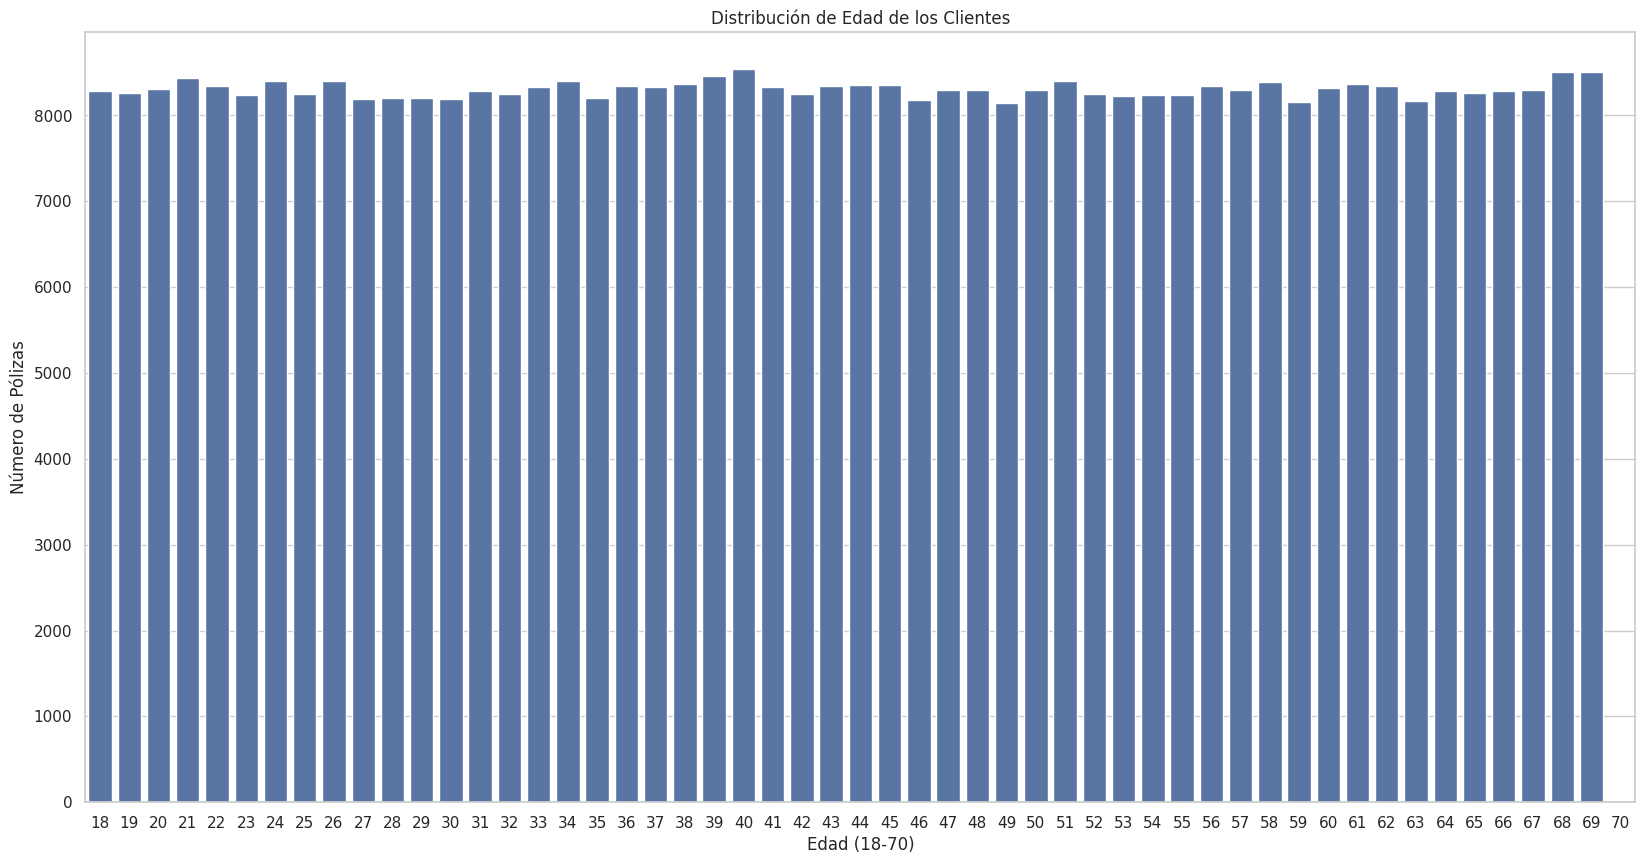

In [ ]:
# Visualización de la distribución de 'Edad'
if not df_calificaron.empty:
    plt.figure(figsize=(20, 10))
    sns.countplot(data=df_ventas, x='edad', order=sorted(df_ventas['edad'].unique()))
    plt.title('Distribución de Edad de los Clientes')
    plt.xlabel('Edad (18-70)')
    plt.ylabel('Número de Pólizas')
    plt.show()

In [ ]:
# Convertir 'fecha_inicio_vigencia' a datetime
df_ventas['fecha_inicio_vigencia'] = pd.to_datetime(df_ventas['fecha_inicio_vigencia'])

# Convertir 'fecha_cancelacion' a datetime
df_ventas['fecha_cancelacion'] = pd.to_datetime(df_ventas['fecha_cancelacion'])

# Obtener la fecha actual
hoy = datetime.now()

# Calcular la duración de la póliza en meses
# Si el estado es 'Cancelada', usar fecha_cancelacion para el cálculo
# Si el estado es 'Vigente', usar la fecha actual (hoy) para el cálculo
df_ventas['duracion_poliza_meses'] = df_ventas.apply(
    lambda row: (row['fecha_cancelacion'] - row['fecha_inicio_vigencia']).days // 30
    if row['estado_actual_poliza'] == 'Cancelada' and pd.notna(row['fecha_cancelacion'])
    else (hoy - row['fecha_inicio_vigencia']).days // 30
    if row['estado_actual_poliza'] == 'Vigente'
    else np.nan, # O un valor por defecto si hay otros estados
    axis=1
)

In [ ]:
# Filtrar para pólizas canceladas y calcular el promedio de duración
df_canceladas = df_ventas[df_ventas['estado_actual_poliza'] == 'Cancelada'].copy()
promedio_duracion_canceladas = df_canceladas['duracion_poliza_meses'].mean()
print(f"\nTiempo promedio de duración de pólizas canceladas (en meses): {promedio_duracion_canceladas:.2f}")


Tiempo promedio de duración de pólizas canceladas (en meses): 2.49


In [ ]:
# Filtrar para pólizas vigentes y calcular el promedio de duración
df_vigentes = df_ventas[df_ventas['estado_actual_poliza'] == 'Vigente'].copy()

# Calcular el promedio de duración de pólizas vigentes hasta la fecha (en meses)
promedio_duracion_vigentes = df_vigentes['duracion_poliza_meses'].mean()
print(f"\nTiempo promedio de duración de pólizas vigentes hasta la fecha (en meses): {promedio_duracion_vigentes:.2f}")

# Calcular la informacion por tipo de poliza
print("\nDuracion promedio polizas:")
print(df_ventas.groupby('tipo_poliza')['duracion_poliza_meses'].mean())


Tiempo promedio de duración de pólizas vigentes hasta la fecha (en meses): 16.38

Duracion promedio polizas:
tipo_poliza
Accidentes Personales    15.639522
Desempleo                15.685155
Enfermedades Graves      15.736210
Hogar                    15.814793
Incendio                 15.596226
Sustracción              15.692584
Terremoto                15.803812
Vida                     15.669553
Name: duracion_poliza_meses, dtype: float64


In [ ]:
#Calculo de la tasa de recepcion de la landing de bienvenida por tipo de póliza

tasa_recepcion_landing = df_ventas.groupby('tipo_poliza')['recibio_landing'].apply(lambda x: (x == 'Si').sum() / len(x))
print("\nTasa de recepción de landing page por tipo de póliza:")
print(tasa_recepcion_landing)


Tasa de recepción de landing page por tipo de póliza:
tipo_poliza
Accidentes Personales    0.751260
Desempleo                0.749964
Enfermedades Graves      0.754220
Hogar                    0.747052
Incendio                 0.745089
Sustracción              0.749516
Terremoto                0.749197
Vida                     0.749366
Name: recibio_landing, dtype: float64


In [ ]:
 # Valor de la Calificacion del NPS de la venta por tipo de póliza

valor_calificacion = df_ventas.groupby('tipo_poliza')['calificacion'].apply(lambda x: (x == 'Si').sum() / len(x))
print("\nValor calificacion NPS por tipo de póliza:")
print(df_ventas.groupby('tipo_poliza')['calificacion'].mean())


Valor calificacion NPS por tipo de póliza:
tipo_poliza
Accidentes Personales    7.975375
Desempleo                7.992751
Enfermedades Graves      7.954242
Hogar                    7.988901
Incendio                 7.988425
Sustracción              7.949624
Terremoto                7.952472
Vida                     7.980755
Name: calificacion, dtype: float64


**Paso 8. Validacion de la correlacion de algunas variables**

Utilizando el pairplot de seaborn en las columnas de Edad, Calificacion, estado de la poliza, Duracion de la poliza, identificaremos la correlación con la persistencia de los clientes. Se generan algunas gráficas para confirmar.

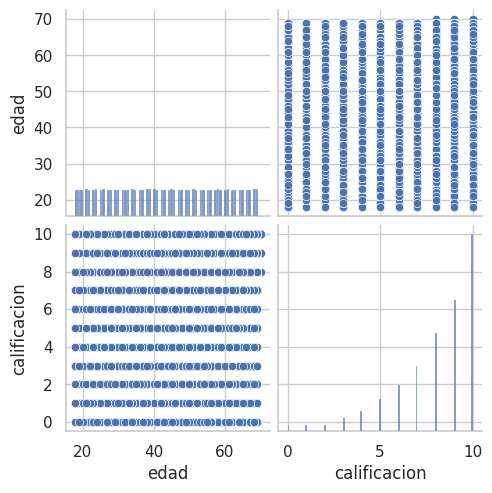

In [ ]:
# Correlacion de algunas varibles de Poliza Vs experiencia cliente

sns.pairplot(df_ventas, vars=['edad', 'calificacion'])

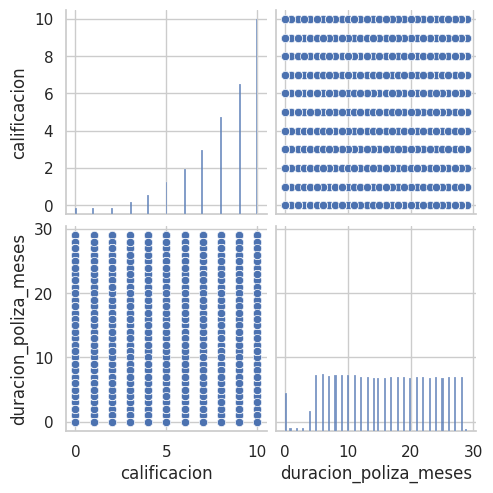

In [ ]:
sns.pairplot(df_ventas, vars=['calificacion', 'duracion_poliza_meses'])

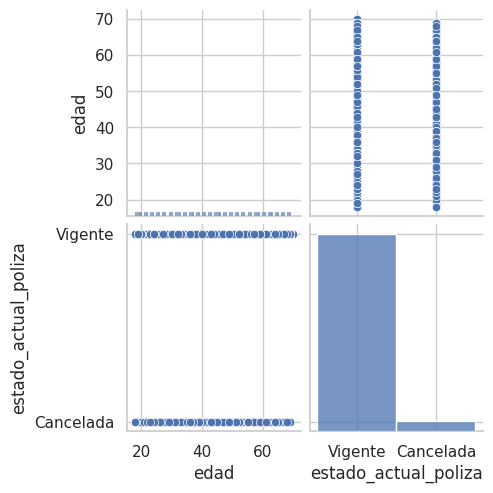

In [ ]:
sns.pairplot(df_ventas, vars=['edad', 'estado_actual_poliza'])

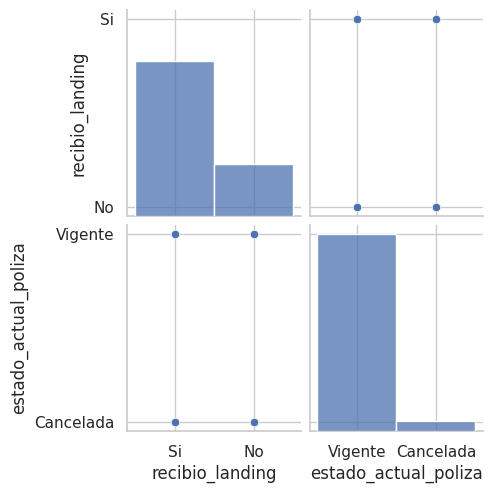

In [ ]:
sns.pairplot(df_ventas, vars=['recibio_landing', 'estado_actual_poliza'])

**Paso 9: Próximos pasos**

Basado en el análisis realizado, se pueden extraer conclusiones sobre el perfil de los clientes por tipo de póliza y línea financiera, así como la efectividad inicial de la comunicación post-venta (landing page).

Próximos pasos:
* Guardar una copia de la data sintetica generada, y validar si es posible integrar datos reales cuando esten disponibles.
* Desarrollar modelos predictivos (ej. predecir si un cliente calificará la experiencia, predecir si el cliente mantendra o no la poliza luego de calificar la experiencia).

In [ ]:
# Mientras obtenemos una data real de ventas, guardamos el DataFrame en un archivo CSV en el entorno de Colab
df_ventas.to_csv('Sales_and_Experience_ResultsCO_v1.csv', index=False)

**Paso 10: Generar el modelo predictivo sobre el conjunto de datos sintético**

Con la base de datos de polizas de seguro vendidas en Colombia entre los años 2023 y 2024, construiremos un pipeline que nos permita predecir si un cliente que recibe la landing de bienvenida (poliza y condicionado) de su producto de seguro y califica la experiencia cliente (NPS), tendra mas persistencia (duracion o permanencia de la poliza contratada) que un cliente que NO recibe la landing de bienvenida y/o califica muy bajo el NPS de venta y como consecuencia decide cancelar la poliza contratada.

***Actividad #1: Importacion de los imputadores***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.ensemble import HistGradientBoostingRegressor # Importar para usarlo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Importar métricas de evaluación

***Actividad #2: Preprocesamiento de Datos***

Preparamos los datos mediante:

La identificacion de características categóricas y numéricas: Determinar qué columnas son numéricas (como 'edad', 'calificacion') y cuáles son categóricas (como 'genero', 'tipo_poliza', 'linea_financiera', etc.). El ajuste de los valores faltantes: En los datos sinteticos tenemos valores faltantes en 'calificacion', entonces debemos ajustarlos (por ejemplo, imputación con la media, mediana, o una constante; o eliminando filas con valores faltantes). En caso de requerirlo, codificaremos las variables categóricas dado que no podremos trabajar con texto y las convertiremos en un formato numérico que los modelos puedan entender. Escalar variables numéricas: Algunos modelos (especialmente los lineales) son sensibles a la escala de las características numéricas. En caso de requerirlo usaremos StandardScaler para normalizar tus datos.

In [ ]:
df_ventas.shape

(432000, 19)

In [ ]:
df_ventas['identificacion'].unique().size

431993

In [ ]:
df_ventas['numero_poliza'].unique().size

432000

In [ ]:
df_ventas.groupby('tipo_vigencia').size()

,0
tipo_vigencia,
Anual,215923
Mensual,216077


In [ ]:
df_ventas.groupby('estado_actual_poliza').size()

,0
estado_actual_poliza,
Cancelada,21770
Vigente,410230


In [ ]:
df_ventas.groupby('recibio_landing').size()

,0
recibio_landing,
No,108014
Si,323986


In [ ]:
df_ventas.groupby('califico_experiencia').size()

,0
califico_experiencia,
No,129681
No Aplica,108014
Si,194305


In [ ]:
df_ventas.groupby('calificacion').size()

,0
calificacion,
0.0,2061
1.0,2074
2.0,2069
3.0,4061
4.0,6194
5.0,10172
6.0,14433
7.0,20366
8.0,30594


In [ ]:
# Identificacion de los promotores con alificacion de NPS 10
df_ventas[(df_ventas['calificacion']==10) & (df_ventas['estado_actual_poliza'] == 'Cancelada') & (df_ventas['causal_cancelacion'] == 'mala venta')]

,primer_nombre,primer_apellido,genero,identificacion,fecha_nacimiento,tipo_poliza,numero_poliza,linea_financiera,fecha_inicio_vigencia,fecha_fin_vigencia,tipo_vigencia,estado_actual_poliza,causal_cancelacion,fecha_cancelacion,recibio_landing,califico_experiencia,calificacion,edad,duracion_poliza_meses
346,Rodrigo,Rodriguez,Masculino,2843003215,1987-09-24,Accidentes Personales,274580394167,cuentas,2023-10-01,2023-10-31,Mensual,Cancelada,mala venta,2023-10-29,Si,Si,10.0,37,0
1180,Rodrigo,Perez,Masculino,1803149313,1958-10-02,Desempleo,464638465369,créditos,2024-08-16,2025-08-16,Anual,Cancelada,mala venta,2024-08-21,Si,Si,10.0,66,0
1816,Simon,Renteria,Masculino,3398575691,1982-06-19,Sustracción,896084439519,cuentas,2023-12-23,2024-12-22,Anual,Cancelada,mala venta,2024-08-15,Si,Si,10.0,42,7
1967,Andres,Martinez,Masculino,2293718220,1985-08-27,Vida,189215163144,cuentas,2024-09-24,2025-09-24,Anual,Cancelada,mala venta,2024-12-10,Si,Si,10.0,39,2
1996,Paula,Castellanos,Femenino,7906945619,1984-12-19,Accidentes Personales,722986713469,Tarjetas de crédito,2023-07-08,2023-08-07,Mensual,Cancelada,mala venta,2023-07-15,Si,Si,10.0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430881,Paula,Martinez,Femenino,1518901127,1984-09-04,Vida,662450738354,cuentas,2024-01-12,2025-01-11,Anual,Cancelada,mala venta,2024-08-20,Si,Si,10.0,40,7
431231,Andres,Castellanos,Masculino,2102899112,2001-06-01,Accidentes Personales,453123836099,cuentas,2023-10-17,2023-11-16,Mensual,Cancelada,mala venta,2023-11-10,Si,Si,10.0,23,0
431440,Fernando,Arias,Masculino,1425416827,1986-02-18,Vida,691520298181,cuentas,2024-01-26,2025-01-25,Anual,Cancelada,mala venta,2024-11-19,Si,Si,10.0,39,9
431788,Sofia,Perez,Femenino,2358459012,2000-09-08,Desempleo,817030984689,créditos,2023-02-19,2024-02-19,Anual,Cancelada,mala venta,2024-01-03,Si,Si,10.0,24,10


In [ ]:
# Identificacion de los detractores con alificacion de NPS 0
df_ventas[(df_ventas['calificacion'] == 0) & (df_ventas['estado_actual_poliza'] == 'Cancelada')]

,primer_nombre,primer_apellido,genero,identificacion,fecha_nacimiento,tipo_poliza,numero_poliza,linea_financiera,fecha_inicio_vigencia,fecha_fin_vigencia,tipo_vigencia,estado_actual_poliza,causal_cancelacion,fecha_cancelacion,recibio_landing,califico_experiencia,calificacion,edad,duracion_poliza_meses
1251,Ivan,Castellanos,Masculino,7992591693,1983-02-24,Vida,834644083627,cuentas,2023-09-13,2023-10-13,Mensual,Cancelada,Voluntaria,2023-10-07,Si,Si,0.0,42,0
3240,Paula,Martinez,Femenino,3809407958,1956-06-09,Terremoto,484195121070,Tarjetas de crédito,2023-04-08,2024-04-07,Anual,Cancelada,Voluntaria,2023-06-28,Si,Si,0.0,68,2
4532,Miguel,Sierra,Masculino,2235573839,1965-04-17,Accidentes Personales,322712697647,cuentas,2023-07-17,2024-07-16,Anual,Cancelada,Voluntaria,2024-05-24,Si,Si,0.0,60,10
6405,Pedro,Mesa,Masculino,1123809389,1999-01-13,Desempleo,124829781453,créditos,2024-08-12,2025-08-12,Anual,Cancelada,mora,2025-05-04,Si,Si,0.0,26,8
9597,Fernando,Rodriguez,Masculino,5007140914,1958-12-06,Accidentes Personales,133156655840,cuentas,2023-12-26,2024-12-25,Anual,Cancelada,mala venta,2024-01-05,Si,Si,0.0,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415069,Flor,Carvajal,Femenino,5462789865,1970-01-16,Vida,155848886946,Tarjetas de crédito,2023-11-01,2024-10-31,Anual,Cancelada,mala venta,2024-01-21,Si,Si,0.0,55,2
419086,Miguel,Perez,Masculino,9820452197,1995-05-04,Accidentes Personales,927059138601,Tarjetas de crédito,2023-09-25,2023-10-25,Mensual,Cancelada,Voluntaria,2023-10-14,Si,Si,0.0,30,0
419199,Felipe,Sanchez,Masculino,9209796604,2007-04-10,Vida,538080478031,Tarjetas de crédito,2023-02-19,2023-03-21,Mensual,Cancelada,Voluntaria,2023-03-18,Si,Si,0.0,18,0
426633,Marcela,Contreras,Femenino,3462385931,1988-03-02,Desempleo,616395991268,créditos,2024-07-11,2024-08-10,Mensual,Cancelada,Voluntaria,2024-07-13,Si,Si,0.0,37,0


***Actividad #3: Definir las características (X) y la variable objetivo (y)***

En nuestro caso de uso, queremos predecir si el estado de la póliza es 'Cancelada' o 'Vigente'. La variable objetivo será 'estado_actual_poliza'.

En nuestro caso de uso, queremos predecir la permanencia promedio del aseguroado con la póliza'Vigente'. La variable objetivo será 'duracion_polizas_meses'.


In [ ]:
df_ventas.groupby('estado_actual_poliza').size()/df_ventas.shape[0]

,0
estado_actual_poliza,
Cancelada,0.050394
Vigente,0.949606


In [ ]:
df_ventas[df_ventas['estado_actual_poliza']=='Cancelada'].sort_values('fecha_inicio_vigencia', ascending=False)

,primer_nombre,primer_apellido,genero,identificacion,fecha_nacimiento,tipo_poliza,numero_poliza,linea_financiera,fecha_inicio_vigencia,fecha_fin_vigencia,tipo_vigencia,estado_actual_poliza,causal_cancelacion,fecha_cancelacion,recibio_landing,califico_experiencia,calificacion,edad,duracion_poliza_meses
340326,Simon,Rodriguez,Masculino,1357227431,1960-01-22,Accidentes Personales,117312358886,cuentas,2024-12-30,2025-01-29,Mensual,Cancelada,mala venta,2025-01-23,Si,Si,7.0,65,0
369061,Guillermo,Gomez,Masculino,5471134073,1966-09-11,Accidentes Personales,799200132435,Tarjetas de crédito,2024-12-30,2025-01-29,Mensual,Cancelada,mora,2025-01-01,Si,Si,5.0,58,0
210757,Liz,Arias,Femenino,7315901071,1964-11-23,Hogar,340179139468,cuentas,2024-12-30,2025-01-29,Mensual,Cancelada,mora,2025-01-25,Si,Si,10.0,60,0
404017,Edgar,Sierra,Masculino,6280594687,1963-06-01,Accidentes Personales,314097231568,cuentas,2024-12-30,2025-01-29,Mensual,Cancelada,mala venta,2025-01-26,No,No Aplica,NaN,62,0
199424,Blanca,Perez,Femenino,7642861070,2001-10-29,Incendio,707854262558,Tarjetas de crédito,2024-12-30,2025-01-29,Mensual,Cancelada,Voluntaria,2025-01-17,No,No Aplica,NaN,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351950,Rodrigo,Contreras,Masculino,5692163576,2002-09-07,Vida,130511324185,cuentas,2023-01-01,2023-01-31,Mensual,Cancelada,mala venta,2023-01-10,No,No Aplica,NaN,22,0
83111,Paula,Renteria,Femenino,7182888216,1971-07-31,Enfermedades Graves,996793873160,Tarjetas de crédito,2023-01-01,2024-01-01,Anual,Cancelada,Voluntaria,2023-07-18,Si,No,NaN,53,6
45309,Laura,Gomez,Femenino,7347675128,2002-05-04,Vida,879907046529,Tarjetas de crédito,2023-01-01,2024-01-01,Anual,Cancelada,mora,2023-07-31,Si,No,NaN,23,7
210946,Laura,Contreras,Femenino,9593143523,1988-07-16,Desempleo,450963455139,créditos,2023-01-01,2023-01-31,Mensual,Cancelada,Voluntaria,2023-01-16,Si,Si,1.0,36,0


In [ ]:
df_ventas.groupby(['tipo_poliza', 'estado_actual_poliza'], as_index=False).size()

,tipo_poliza,estado_actual_poliza,size
0,Accidentes Personales,Cancelada,5113
1,Accidentes Personales,Vigente,96258
2,Desempleo,Cancelada,4556
3,Desempleo,Vigente,86927
4,Enfermedades Graves,Cancelada,814
5,Enfermedades Graves,Vigente,16010
6,Hogar,Cancelada,812
7,Hogar,Vigente,16061
8,Incendio,Cancelada,481
9,Incendio,Vigente,8581


## 4. Guideline to develop some predictive model

* Use a `DummyClassifier` to get a dummy baseline.
* Evaluate this model using cross-validation. You can use a `StratifiedKFold` strategy.
* Check the accuracy score on both the training and testing sets. Is it an appropriate metric? Compare it with the ROC AUC or another better metric.
* Develop a predictive model using a linear model. Use the appropriate preprocessing for this model.
* Evaluate this model with the dummy baseline.
* Optimized the hyperparameter of your model using a `RandomizedSearchCV` or a `GridSearchCV`. Do you improve the results?
* Can you think of additional preprocessing methods to be added to your linear model: `SplineTransformer`, `PolynomialFeatures`, etc.
* Evaluate such a model.
* Develop a predictive model based on `HistGradientBoostingClassifier`. Choose an appropriate preprocessing.
* Evaluate this model.
* Fine tune and evaluate the model again.
* Split the dataset into a training and testing set. Compute the feature importance of this model using the function `permutation_importance`. Check the importance on both the training and testing set.
* Instead of computing the ROC AUC, let's derive a business metric by replacing with cost and gain the entries of the confusion matrix (i.e. TP, TN, FP, FN). By default, the scikit-learn classifier will use a cut-off point at a 0.5 probability. Vary this cut-off point and compute the business metric for the different thresholds. Which cut-off point do you find?

,0
tipo_poliza,
Accidentes Personales,"Axes(0.125,0.11;0.775x0.77)"
Desempleo,"Axes(0.125,0.11;0.775x0.77)"
Enfermedades Graves,"Axes(0.125,0.11;0.775x0.77)"
Hogar,"Axes(0.125,0.11;0.775x0.77)"
Incendio,"Axes(0.125,0.11;0.775x0.77)"
Sustracción,"Axes(0.125,0.11;0.775x0.77)"
Terremoto,"Axes(0.125,0.11;0.775x0.77)"
Vida,"Axes(0.125,0.11;0.775x0.77)"


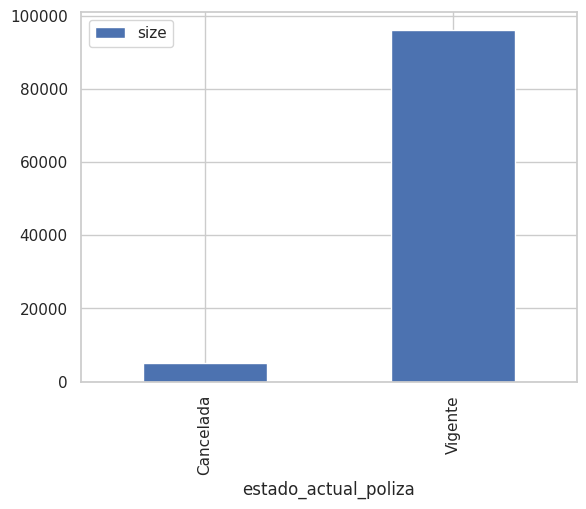

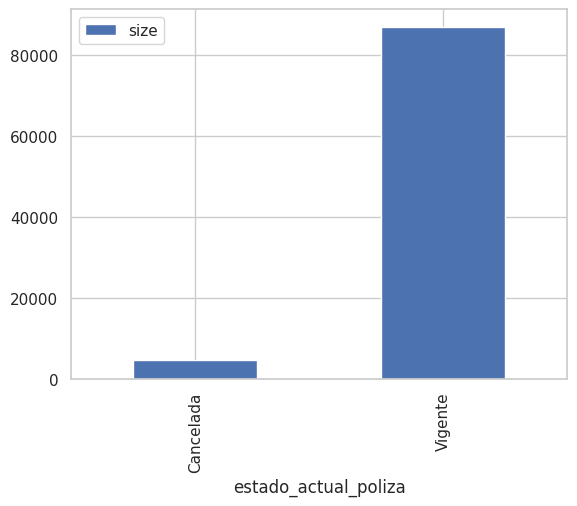

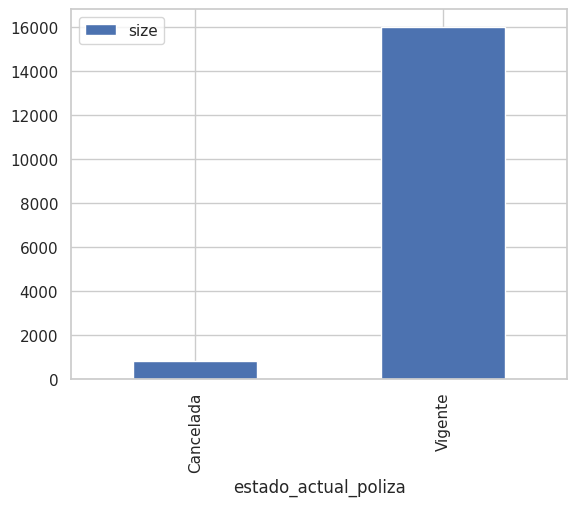

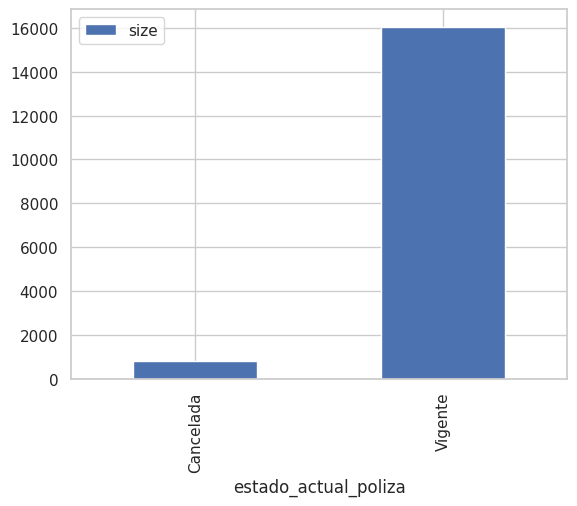

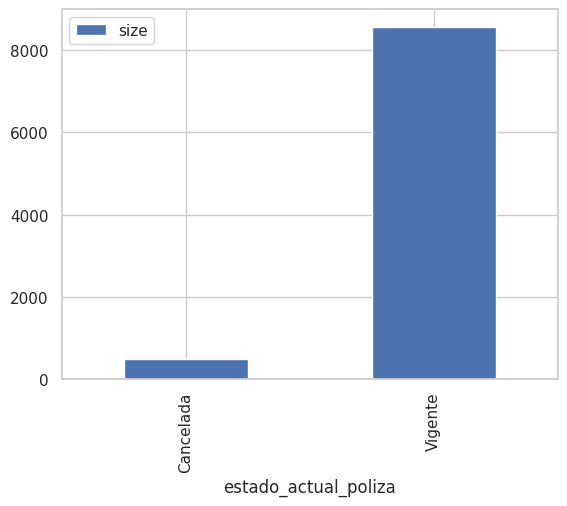

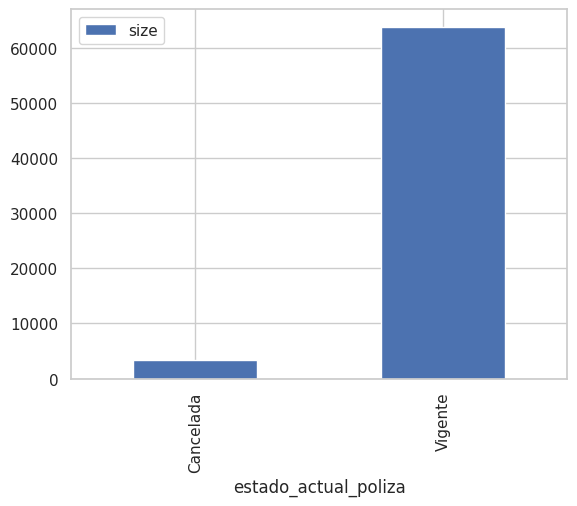

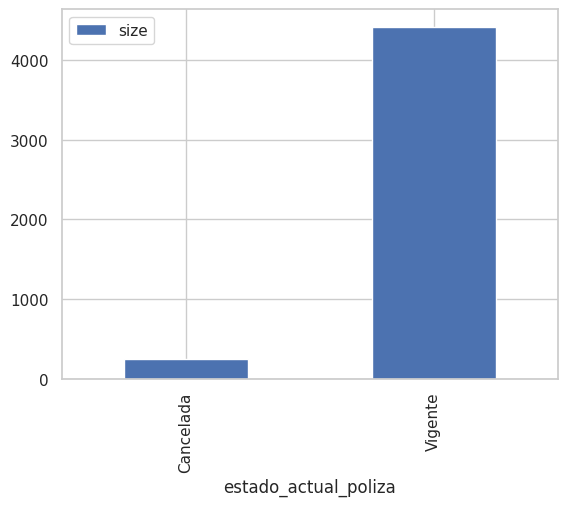

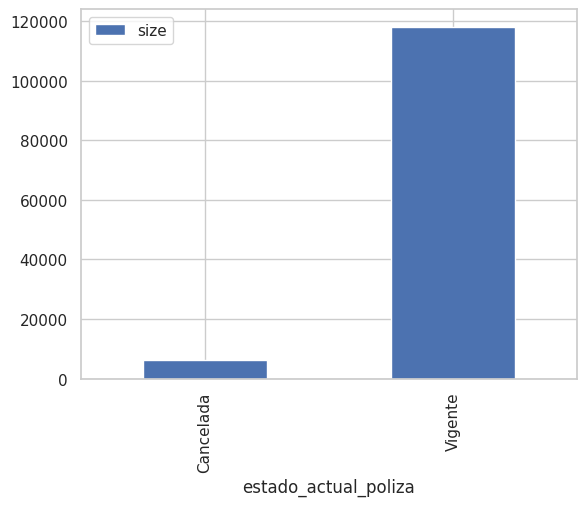

In [ ]:
df_ventas.groupby(['tipo_poliza', 'estado_actual_poliza'], as_index=False).size().groupby('tipo_poliza').plot(kind='bar', x='estado_actual_poliza', y='size')

In [ ]:
from sklearn.model_selection import train_test_split
target = df_ventas["estado_actual_poliza"]
features = df_ventas.drop(columns="estado_actual_poliza")

selection_features, evaluation_features, selection_target, evaluation_target = train_test_split(
    features, target, test_size=.2, shuffle=True
)
selection_target.shape

(345600,)

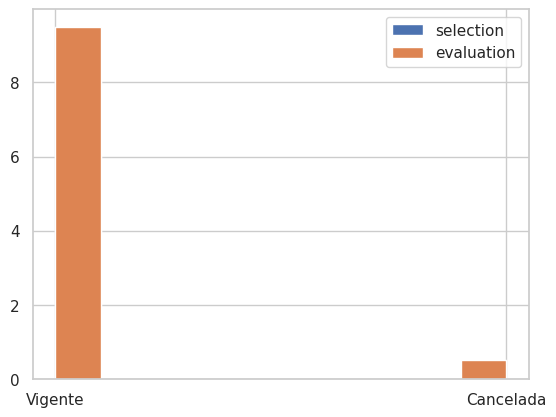

In [ ]:
selection_target.hist(label='selection', density=True)
evaluation_target.hist(label='evaluation', density=True)
plt.legend()

In [ ]:
selection_features_numeric = selection_features.select_dtypes("number")

In [ ]:
selection_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345600 entries, 232266 to 339111
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   identificacion         345600 non-null  int64  
 1   numero_poliza          345600 non-null  int64  
 2   calificacion           155305 non-null  float64
 3   edad                   345600 non-null  int64  
 4   duracion_poliza_meses  345600 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 15.8 MB


array([[<Axes: title={'center': 'identificacion'}>,
        <Axes: title={'center': 'numero_poliza'}>],
       [<Axes: title={'center': 'calificacion'}>,
        <Axes: title={'center': 'edad'}>],
       [<Axes: title={'center': 'duracion_poliza_meses'}>, <Axes: >]],
      dtype=object)

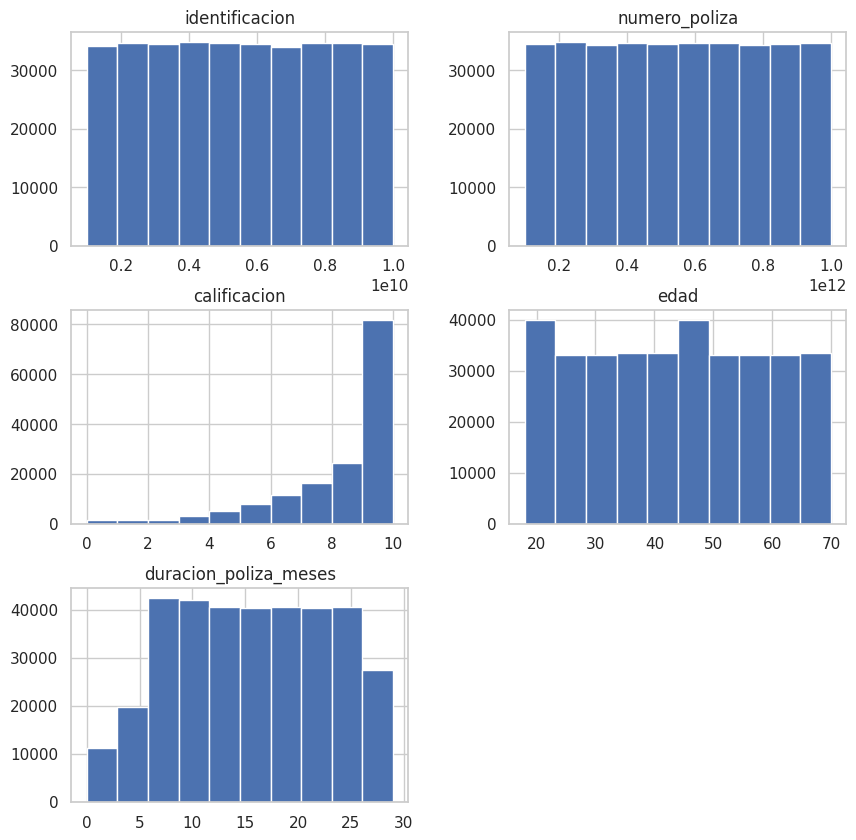

In [ ]:
selection_features_numeric.hist(figsize=(10, 10))

In [ ]:
selection_features_object = selection_features.select_dtypes("object")
selection_features_object.head()

,primer_nombre,primer_apellido,genero,tipo_poliza,linea_financiera,fecha_fin_vigencia,tipo_vigencia,causal_cancelacion,recibio_landing,califico_experiencia
232266,Fernando,Sierra,Masculino,Desempleo,créditos,2024-02-26,Anual,NaN,Si,No
342030,Marcela,Sanchez,Femenino,Sustracción,Tarjetas de crédito,2024-11-30,Mensual,NaN,Si,Si
389285,Juan,Sanchez,Masculino,Accidentes Personales,cuentas,2023-04-25,Mensual,NaN,Si,No
305981,Liliana,Arias,Femenino,Desempleo,créditos,2023-09-08,Mensual,NaN,Si,Si
326601,Ivan,Renteria,Masculino,Vida,Tarjetas de crédito,2024-12-06,Mensual,Voluntaria,Si,No


In [ ]:
# Encode the target variable 'estado_actual_poliza' into numerical labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(df_ventas["estado_actual_poliza"])

# Define features by dropping the target variable and irrelevant columns
features = df_ventas.drop(columns=["estado_actual_poliza", 'primer_nombre', 'primer_apellido', 'identificacion', 'numero_poliza', 'fecha_nacimiento', 'fecha_inicio_vigencia', 'fecha_fin_vigencia', 'fecha_cancelacion', 'causal_cancelacion', 'duracion_poliza_meses'])

# Use the encoded target variable
selection_features, evaluation_features, selection_target_encoded, evaluation_target_encoded = train_test_split(
    features, target_encoded, test_size=.2, shuffle=True, stratify=target_encoded # Add stratify for balanced split
)

# Identify numerical and categorical columns
numerical_features = selection_features.select_dtypes(include=np.number).columns.tolist()
categorical_features = selection_features.select_dtypes(include='object').columns.tolist()

# Impute missing values and then scale the features
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='mean'), # You can choose 'median' or a constant value
    StandardScaler()
)

# Create a preprocessor for categorical features
# Impute missing categorical values (if any) with a constant and then One-Hot Encode
# Handling NaNs in categorical features before OneHotEncoding is important
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'), # Handle potential missing values in categorical data
    OneHotEncoder(handle_unknown='ignore')
)

# Create the column transformer
# Apply the numerical transformer to numerical features
# Apply the categorical transformer to categorical features
# Drop any other columns that are not explicitly handled
preprocessing = make_column_transformer(
    (numerical_transformer, numerical_features),
    (categorical_transformer, categorical_features),
    remainder='drop' # Drop columns not explicitly transformed
)

In [ ]:
# Definir características (X) y variable objetivo (y)
X_regresion = df_ventas.drop(columns=[
    'estado_actual_poliza', # Relacionado con la variable objetivo
    'primer_nombre', 'primer_apellido', 'identificacion', 'numero_poliza', # Identificadores
    'fecha_nacimiento', 'fecha_inicio_vigencia', 'fecha_fin_vigencia', 'fecha_cancelacion', # Fechas
    'causal_cancelacion', # Relacionado directamente con el estado/duración
    'duracion_poliza_meses' # Variable objetivo
])
y_regresion = df_ventas['duracion_poliza_meses']

In [ ]:
# Eliminar filas con NaNs en la variable objetivo de regresión si existen
X_regresion = X_regresion[y_regresion.notna()]
y_regresion = y_regresion.dropna()


In [ ]:
# Separar datos en conjuntos de entrenamiento y evaluación
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regresion, y_regresion, test_size=0.2, random_state=42
)

In [ ]:
# Identificar columnas numéricas y categóricas
numerical_features_reg = X_train_reg.select_dtypes(include=np.number).columns.tolist()
categorical_features_reg = X_train_reg.select_dtypes(include='object').columns.tolist()

In [ ]:
# Preprocesamiento para regresión
numerical_transformer_reg = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

categorical_transformer_reg = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_reg, numerical_features_reg),
        ('cat', categorical_transformer_reg, categorical_features_reg)
    ],
    remainder='drop'
)

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent") # O "stratified"
pipeline_dummy = make_pipeline(preprocessing, dummy_clf)
scores_dummy = cross_val_score(pipeline_dummy, selection_features, selection_target_encoded, scoring='roc_auc', cv=StratifiedKFold(n_splits=5))
print("Mean cross-validation score (ROC AUC) DummyClassifier:", scores_dummy.mean())

Mean cross-validation score (ROC AUC) DummyClassifier: 0.5


In [ ]:
# --- Modelado y Evaluación para Regresión ---
print("\n--- Predicción de la permanencia de la póliza (en meses) ---")


--- Predicción de la permanencia de la póliza (en meses) ---


# **REGRESION LINEAL**

In [ ]:
# 1. Linear Regression
print("\nEvaluando Linear Regression:")
linear_regression = LinearRegression()
pipeline_lr_reg = make_pipeline(preprocessor_reg, linear_regression)

# Evaluación con validación cruzada
# Usamos KFold para regresión (no hay clases que estratificar)
cv_scores_lr_reg_mae = cross_val_score(
    pipeline_lr_reg, X_train_reg, y_train_reg, cv=KFold(n_splits=5), scoring='neg_mean_absolute_error'
)
cv_scores_lr_reg_mse = cross_val_score(
    pipeline_lr_reg, X_train_reg, y_train_reg, cv=KFold(n_splits=5), scoring='neg_mean_squared_error'
)
cv_scores_lr_reg_r2 = cross_val_score(
    pipeline_lr_reg, X_train_reg, y_train_reg, cv=KFold(n_splits=5), scoring='r2'
)
print(f"MAE (CV) Linear Regression: {-cv_scores_lr_reg_mae.mean():.4f} +/- {cv_scores_lr_reg_mae.std():.4f}")
print(f"RMSE (CV) Linear Regression: {np.sqrt(-cv_scores_lr_reg_mse.mean()):.4f} +/- {np.sqrt(cv_scores_lr_reg_mse.std()):.4f}")
print(f"R2 (CV) Linear Regression: {cv_scores_lr_reg_r2.mean():.4f} +/- {cv_scores_lr_reg_r2.std():.4f}")


Evaluando Linear Regression:
MAE (CV) Linear Regression: 6.4662 +/- 0.0136
RMSE (CV) Linear Regression: 7.5318 +/- 0.4831
R2 (CV) Linear Regression: 0.0002 +/- 0.0001


# **GRADIENTE**

In [ ]:
# 2. HistGradientBoostingRegressor
print("\nEvaluando HistGradientBoostingRegressor:")
hist_gb_reg = HistGradientBoostingRegressor(random_state=42)
pipeline_hist_gb_reg = make_pipeline(preprocessor_reg, hist_gb_reg) # HistGB maneja NaNs internamente, pero el imputer no hace daño

# Evaluación con validación cruzada
cv_scores_hist_gb_reg_mae = cross_val_score(
    pipeline_hist_gb_reg, X_train_reg, y_train_reg, cv=KFold(n_splits=5), scoring='neg_mean_absolute_error'
)
cv_scores_hist_gb_reg_mse = cross_val_score(
    pipeline_hist_gb_reg, X_train_reg, y_train_reg, cv=KFold(n_splits=5), scoring='neg_mean_squared_error'
)
cv_scores_hist_gb_reg_r2 = cross_val_score(
    pipeline_hist_gb_reg, X_train_reg, y_train_reg, cv=KFold(n_splits=5), scoring='r2'
)
print(f"MAE (CV) HistGradientBoostingRegressor: {-cv_scores_hist_gb_reg_mae.mean():.4f} +/- {-cv_scores_hist_gb_reg_mae.std():.4f}")
print(f"RMSE (CV) HistGradientBoostingRegressor: {np.sqrt(-cv_scores_hist_gb_reg_mse.mean()):.4f} +/- {np.sqrt(cv_scores_hist_gb_reg_mse.std()):.4f}")
print(f"R2 (CV) HistGradientBoostingRegressor: {cv_scores_hist_gb_reg_r2.mean():.4f} +/- {cv_scores_hist_gb_reg_r2.std():.4f}")


# Puedes hacer una optimización de hiperparámetros similar para regresión
# Evaluación final en el conjunto de prueba con el mejor modelo encontrado (ej. HistGradientBoostingRegressor)
best_model_reg = pipeline_hist_gb_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = best_model_reg.predict(X_test_reg)

print("\nResultados en el conjunto de prueba:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")
print(f"R-squared (R2): {r2_score(y_test_reg, y_pred_reg):.4f}")


Evaluando HistGradientBoostingRegressor:
MAE (CV) HistGradientBoostingRegressor: 6.4664 +/- -0.0136
RMSE (CV) HistGradientBoostingRegressor: 7.5323 +/- 0.4840
R2 (CV) HistGradientBoostingRegressor: 0.0001 +/- 0.0001

Resultados en el conjunto de prueba:
Mean Absolute Error (MAE): 6.4616
Mean Squared Error (MSE): 56.6793
Root Mean Squared Error (RMSE): 7.5286
R-squared (R2): 0.0000


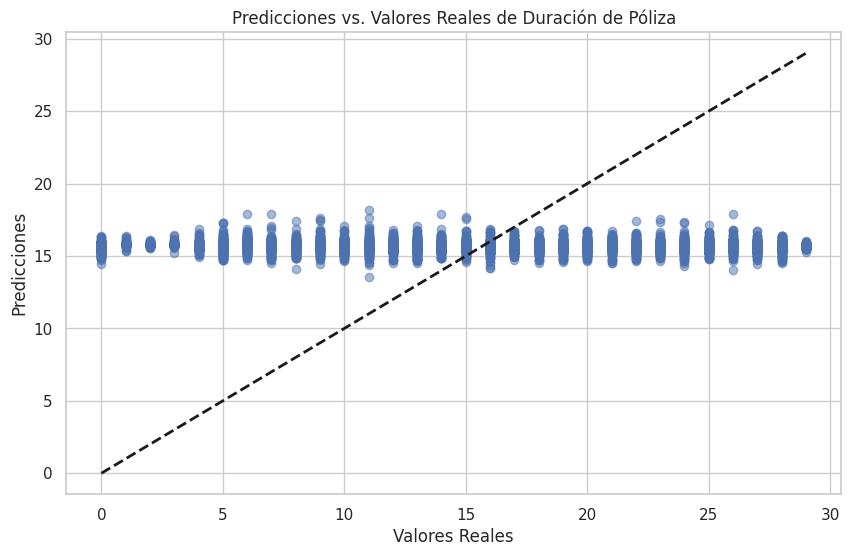

In [ ]:
# Visualización de las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2) # Línea ideal
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales de Duración de Póliza")
plt.show()

# **REGRESION LOGISTICA**

In [ ]:
#3  LogisticRegression instead of LinearRegression
classifier = LogisticRegression(max_iter=1000) # Increased max_iter for potential convergence issues

# Create the classification pipeline
classification_pipeline = make_pipeline(
    preprocessing,
    classifier
)

# Evaluate the classification pipeline using cross-validation
# Use a classification metric like 'roc_auc' or 'accuracy'
scores = cross_val_score(
    classification_pipeline,
    selection_features, # Use the original features dataframe
    selection_target_encoded, # Use the encoded target variable
    scoring='roc_auc', # or 'accuracy'
    cv=StratifiedKFold(n_splits=5) # Use StratifiedKFold for classification
)

print("Cross-validation scores (ROC AUC):", scores)
print("Mean cross-validation score (ROC AUC):", scores.mean())

Cross-validation scores (ROC AUC): [0.49087691 0.5013643  0.50183861 0.50928396 0.49796702]
Mean cross-validation score (ROC AUC): 0.5002661593721607


# **OTROS ELEMENTOS RECOPILADOS - NO USADOS**

In [ ]:
target_column = set(["estado_actual_poliza"])

In [ ]:
df_ventas['estado_actual_poliza']

,estado_actual_poliza
0,Vigente
1,Vigente
2,Vigente
3,Vigente
4,Vigente
...,...
431995,Vigente
431996,Vigente
431997,Vigente
431998,Vigente


In [ ]:
# Define a set of columns to exclude from features
dangerous_columns = set([
    'primer_nombre',
    'primer_apellido',
    'identificacion',
    'numero_poliza',
    'fecha_nacimiento',
    'fecha_inicio_vigencia',
    'fecha_fin_vigencia',
    'fecha_cancelacion',
    'causal_cancelacion',
])

target_train = df_ventas[list(target_column)]
features_train = df_ventas.drop(columns=list(target_column | dangerous_columns))